# ***Online Food Oeder System Dataset***
**Description:**
The dataset contains information collected from an online food ordering platform over a period of time. It encompasses various attributes related to Occupation, Family Size, Feedback etc


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
food = pd.read_csv("/content/drive/MyDrive/DM_Project/Online-Food.csv")

In [ ]:
food

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,Output,Feedback
0,20.0,Female,Single,Student,Post Graduate,4.0,Yes,Positive
1,NaN,Female,Single,Student,Graduate,3.0,Yes,Positive
2,22.0,Male,Single,Student,Post Graduate,NaN,Yes,Negative
3,22.0,Female,Single,NaN,Graduate,6.0,Yes,Positive
4,22.0,Male,Single,Student,Post Graduate,4.0,Yes,NaN
...,...,...,...,...,...,...,...,...
383,23.0,Female,Single,Student,Post Graduate,2.0,Yes,Positive
384,23.0,Female,Single,NaN,Post Graduate,4.0,Yes,Positive
385,22.0,Female,Single,Student,Post Graduate,5.0,Yes,Positive
386,23.0,Male,Single,Student,Post Graduate,2.0,Yes,Positive


In [ ]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         372 non-null    float64
 1   Gender                      371 non-null    object 
 2   Marital Status              373 non-null    object 
 3   Occupation                  370 non-null    object 
 4   Educational Qualifications  388 non-null    object 
 5   Family size                 377 non-null    float64
 6   Output                      363 non-null    object 
 7   Feedback                    362 non-null    object 
dtypes: float64(2), object(6)
memory usage: 24.4+ KB


'food.isna().sum()' will return a Series where each element represents the count of missing values in the corresponding column of the DataFrame food. This is a quick way to get a summary of missing values in each column of a DataFrame.







In [ ]:
food.isna().sum()

Age                           16
Gender                        17
Marital Status                15
Occupation                    18
Educational Qualifications     0
Family size                   11
Output                        25
Feedback                      26
dtype: int64

# **# Handle the Missing Values**

---


The 'fillna()'' method in pandas is used to fill NaN (missing) values in a DataFrame or Series with specified values. It provides a flexible way to handle missing data in your dataset.

In [ ]:
new_food = food.fillna({
        'Gender': 'Female',
        'Marital Status': 'Married',
        'Occupation': 'Employee',
        'Output': 'No',
    }) # fill null value in each column by separate value
new_food.head()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,Output,Feedback
0,20.0,Female,Single,Student,Post Graduate,4.0,Yes,Positive
1,NaN,Female,Single,Student,Graduate,3.0,Yes,Positive
2,22.0,Male,Single,Student,Post Graduate,NaN,Yes,Negative
3,22.0,Female,Single,Employee,Graduate,6.0,Yes,Positive
4,22.0,Male,Single,Student,Post Graduate,4.0,Yes,NaN


Fill the missing values with the help of mean(),median() and mode() function


*   **Age_mean:**
Age_mean now holds the mean age of the individuals in the 'Age' column of the DataFrame new_food

*   **family_size_median:**
family_size_median now holds the mean age of the individuals in the 'Family Size' column of the DataFrame new_food


*   **Feedback_mode:**
Feedback_mode now holds the mean age of the individuals in the 'Feedback' column of the DataFrame new_food

*   List item




In [ ]:
new_food.isna().sum()

Age                           16
Gender                         0
Marital Status                 0
Occupation                     0
Educational Qualifications     0
Family size                   11
Output                         0
Feedback                      26
dtype: int64

In [ ]:
Age_mean=new_food['Age'].mean()
Age_mean

24.666666666666668

In [ ]:
family_size_median = new_food['Family size'].median()
family_size_median

3.0

In [ ]:
Feedback_mode = new_food['Feedback'].mode()[0]
Feedback_mode

'Positive'

In [ ]:
new_food['Age'].fillna(value=Age_mean, inplace=True)
new_food['Family size'].fillna(value=family_size_median, inplace=True)
new_food['Feedback'].fillna(value=Feedback_mode, inplace=True)
new_food.head()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,Output,Feedback
0,20.000000,Female,Single,Student,Post Graduate,4.0,Yes,Positive
1,24.666667,Female,Single,Student,Graduate,3.0,Yes,Positive
2,22.000000,Male,Single,Student,Post Graduate,3.0,Yes,Negative
3,22.000000,Female,Single,Employee,Graduate,6.0,Yes,Positive
4,22.000000,Male,Single,Student,Post Graduate,4.0,Yes,Positive


Now no missing value in dataset

In [ ]:
new_food.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Educational Qualifications    0
Family size                   0
Output                        0
Feedback                      0
dtype: int64

In [ ]:
new_food.head()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,Output,Feedback
0,20.000000,Female,Single,Student,Post Graduate,4.0,Yes,Positive
1,24.666667,Female,Single,Student,Graduate,3.0,Yes,Positive
2,22.000000,Male,Single,Student,Post Graduate,3.0,Yes,Negative
3,22.000000,Female,Single,Employee,Graduate,6.0,Yes,Positive
4,22.000000,Male,Single,Student,Post Graduate,4.0,Yes,Positive


# **# Handling categorical features**
**Label Encoding:** Label encoding is a process of converting categorical data into numerical form. In Python, the scikit-learn library provides a convenient way to perform label encoding using the LabelEncoder class.

In [ ]:
import numpy as np
new_food['Output']=np.where(new_food['Output']=="Yes",1,0)
new_food['Gender']=np.where(new_food['Gender']=="Male",1,0)
new_food.head()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,Output,Feedback
0,20.000000,0,Single,Student,Post Graduate,4.0,1,Positive
1,24.666667,0,Single,Student,Graduate,3.0,1,Positive
2,22.000000,1,Single,Student,Post Graduate,3.0,1,Negative
3,22.000000,0,Single,Employee,Graduate,6.0,1,Positive
4,22.000000,1,Single,Student,Post Graduate,4.0,1,Positive


In [ ]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'team' column
new_food['Marital Status'] = lab.fit_transform(new_food['Marital Status'])
new_food['Occupation'] = lab.fit_transform(new_food['Occupation'])
new_food['Educational Qualifications'] = lab.fit_transform(new_food['Educational Qualifications'])
new_food['Output'] = lab.fit_transform(new_food['Output'])
new_food['Feedback'] = lab.fit_transform(new_food['Feedback'])

In [ ]:
new_food.head()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,Output,Feedback
0,20.000000,0,2,3,2,4.0,1,1
1,24.666667,0,2,3,0,3.0,1,1
2,22.000000,1,2,3,2,3.0,1,0
3,22.000000,0,2,0,0,6.0,1,1
4,22.000000,1,2,3,2,4.0,1,1


# **# Train and Test Dataset**

In [ ]:
new_food.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation',
       'Educational Qualifications', 'Family size', 'Output', 'Feedback'],
      dtype='object')

In [ ]:
X = new_food.drop("Feedback",axis=1)   #Feature Matrix
y = new_food["Feedback"]

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((271, 7), (117, 7))

In [ ]:
X_train.corr()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,Output
Age,1.000000,0.054316,-0.634245,-0.496232,0.024397,0.243565,-0.165739
Gender,0.054316,1.000000,0.059818,-0.013547,-0.032121,-0.075665,0.048027
Marital Status,-0.634245,0.059818,1.000000,0.457582,0.081004,-0.282698,0.185982
Occupation,-0.496232,-0.013547,0.457582,1.000000,0.177422,-0.127167,0.146650
Educational Qualifications,0.024397,-0.032121,0.081004,0.177422,1.000000,0.022899,0.092593
Family size,0.243565,-0.075665,-0.282698,-0.127167,0.022899,1.000000,-0.036860
Output,-0.165739,0.048027,0.185982,0.146650,0.092593,-0.036860,1.000000


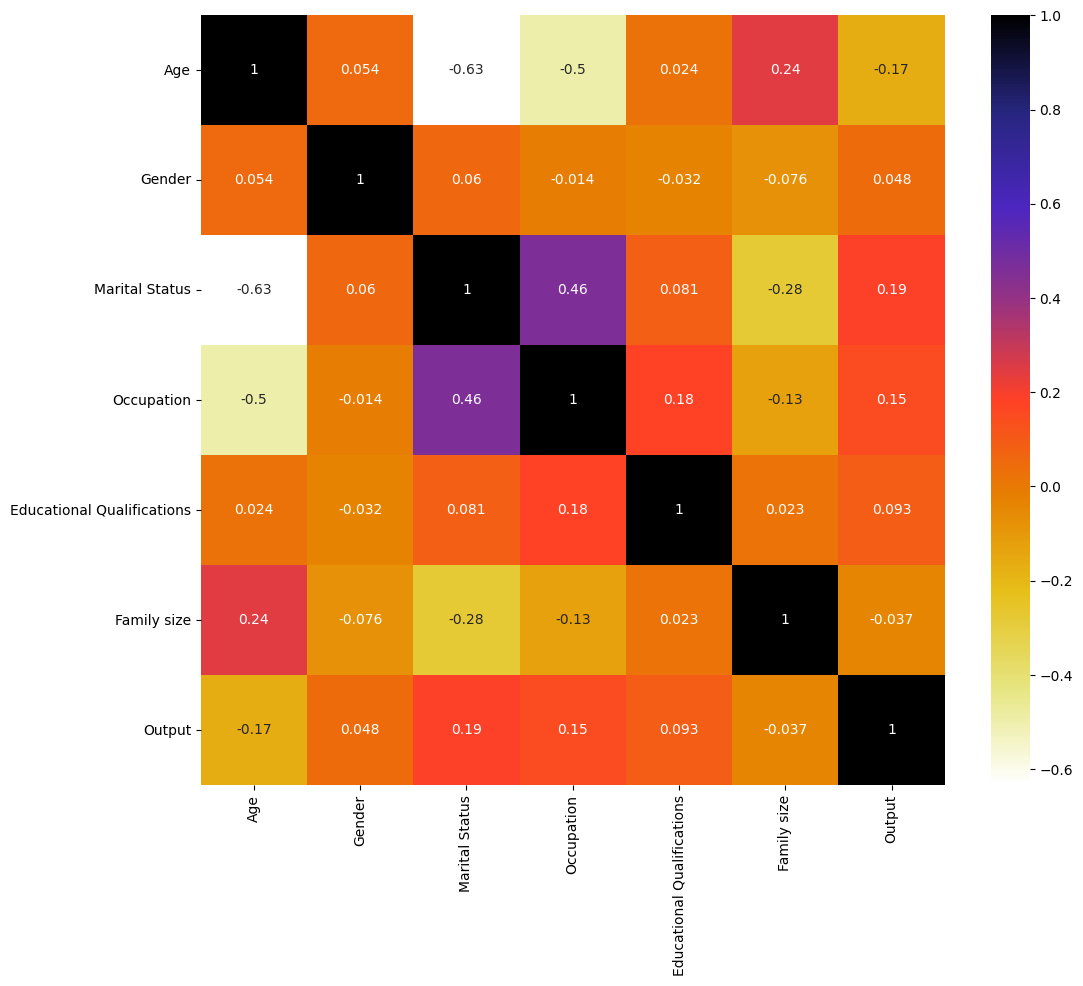

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


:
# **# To implement Decision Tree Classifier using python**
- Analyze customer feedback to improve service quality of online food system



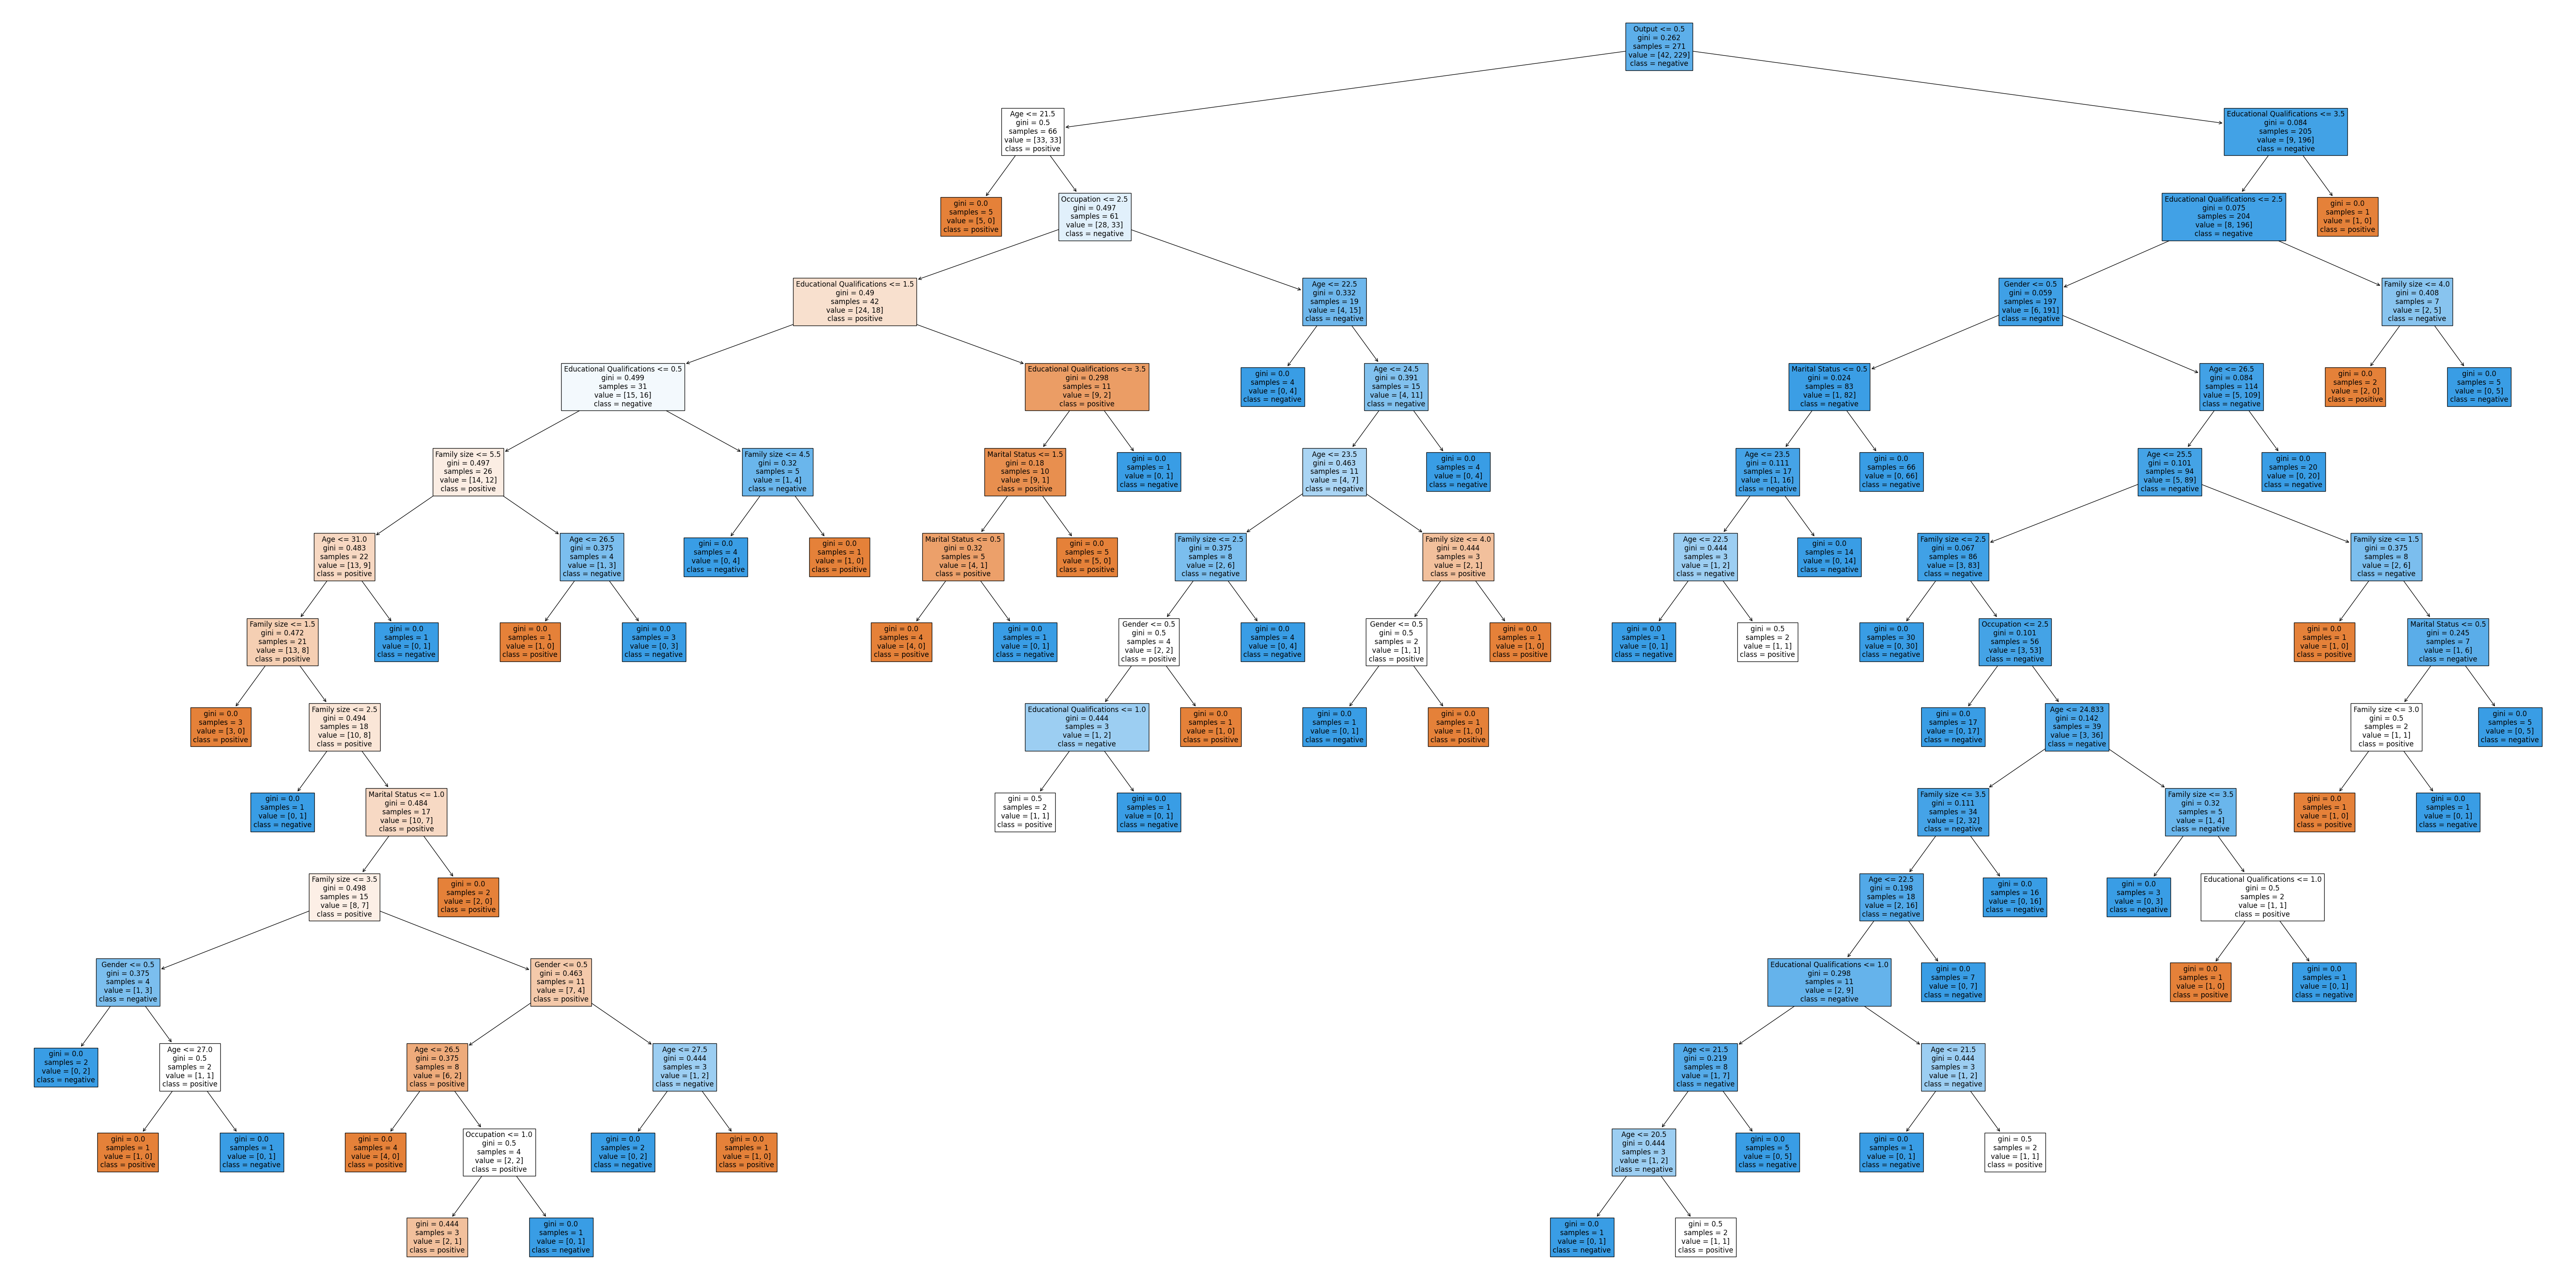

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

import matplotlib.pyplot as plt

# Create the decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(80,40))
tree.plot_tree(clf, feature_names=X.columns, class_names=['positive', 'negative'], filled=True)
plt.show()

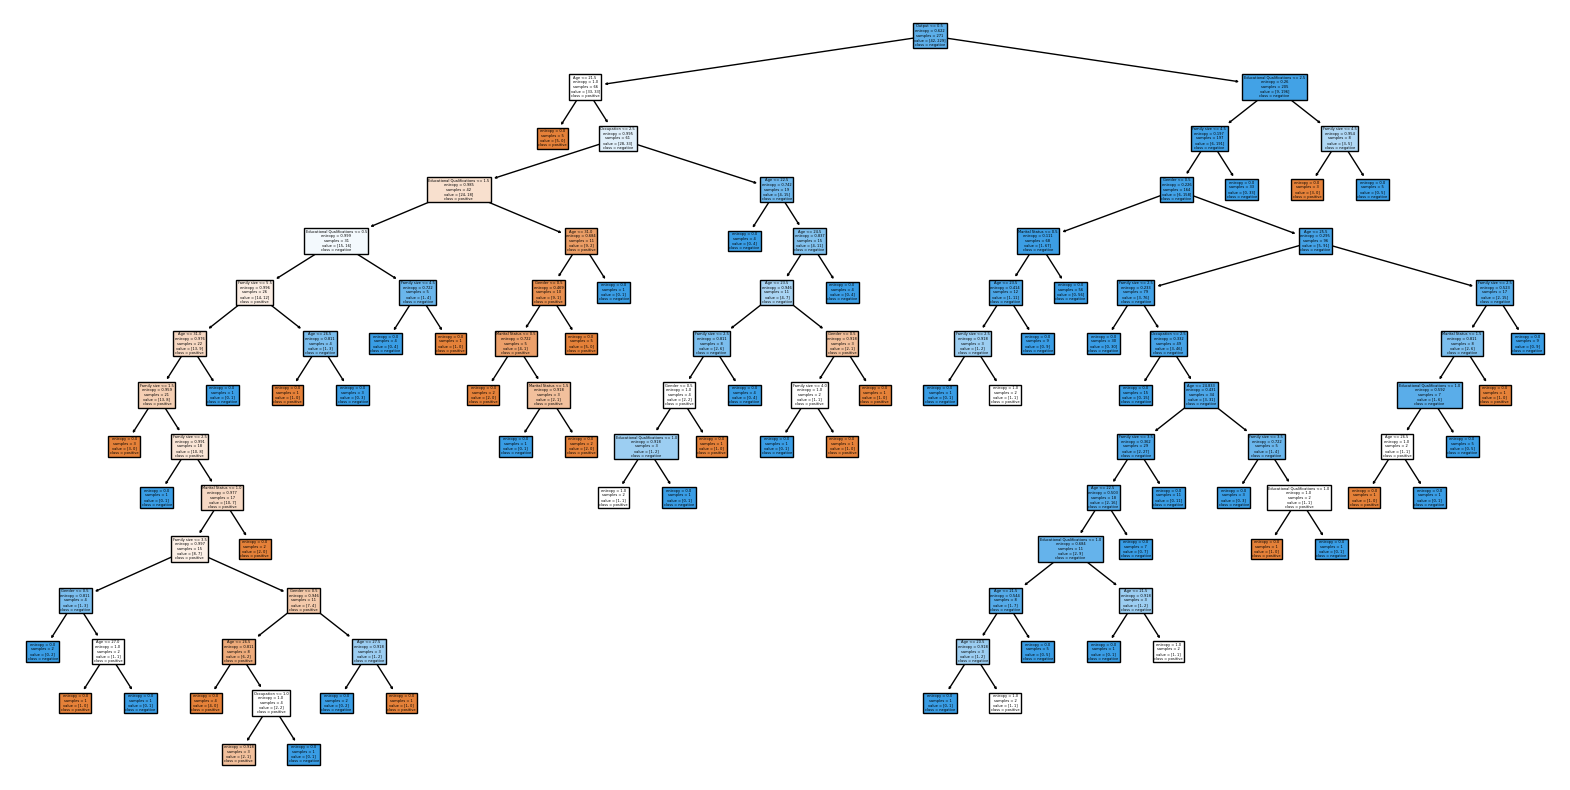

In [ ]:
#Create the decision tree classifier with information gain criterion
clf = DecisionTreeClassifier(criterion='entropy')

# Train the classifier
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['positive', 'negative'], filled=True)
plt.show()

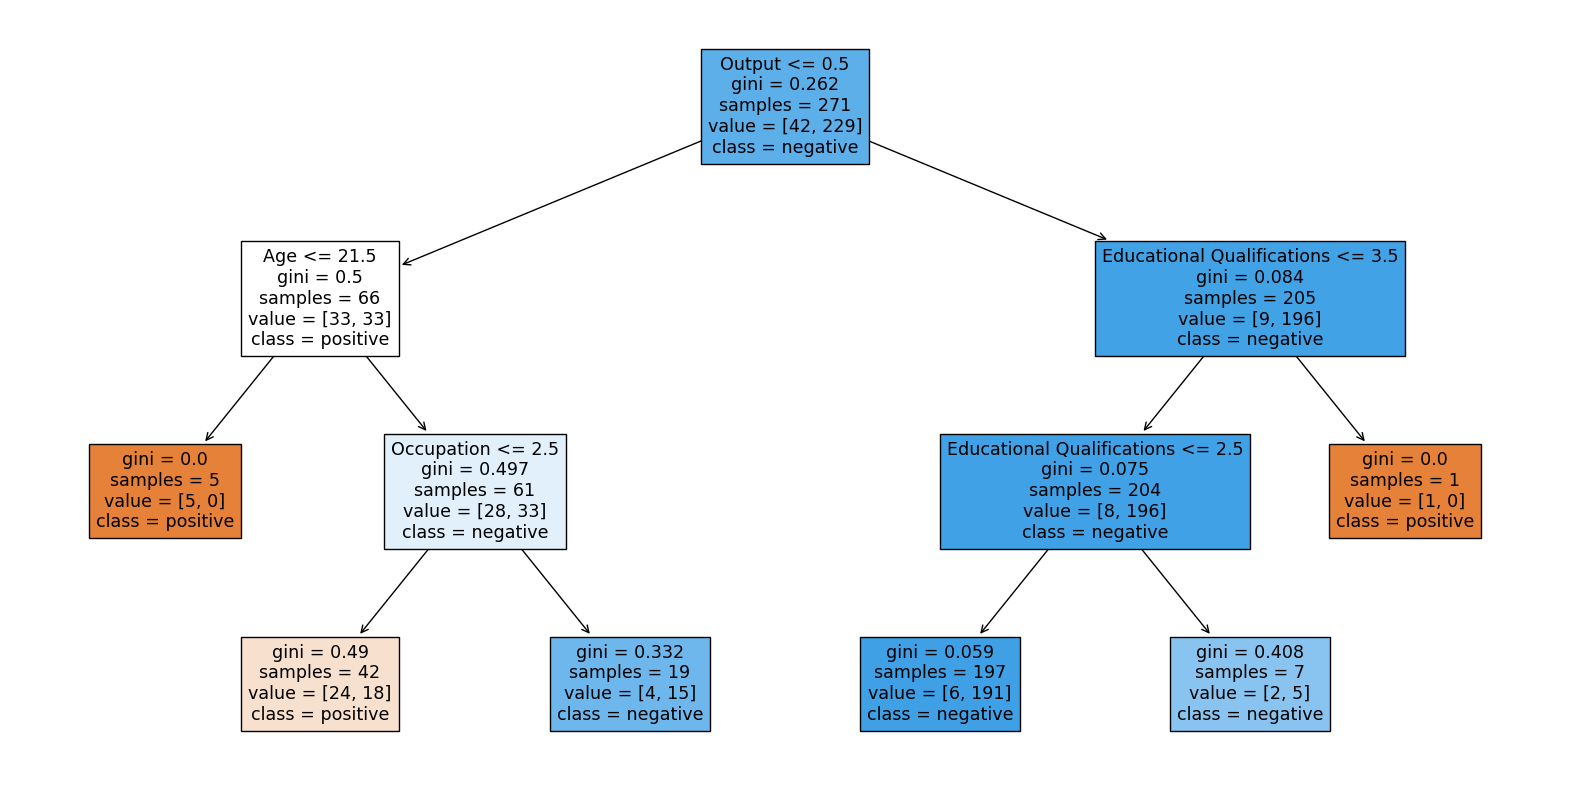

In [ ]:
# Create the decision tree classifier with max_depth=n
clf = DecisionTreeClassifier(max_depth=3)

# Train the classifier
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['positive', 'negative'], filled=True)
plt.show()

# **#To implement Navie Bayes Classifier using python**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming df is your DataFrame containing the data
# Splitting data into features and target
X = new_food.drop(columns=['Feedback'])
y = new_food['Feedback']

# Preprocessing categorical target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fitting the classifier to the training data
nb_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = nb_classifier.predict(X_test)

# Evaluating the classifier
accuracy = (y_pred == y_test).mean()
print("Accuracy: \n",accuracy)

Accuracy: 
 0.8589743589743589


## **#To implement Support Vevtor Machine using python**


In [ ]:
from sklearn.svm import SVC

# Initializing Support Vector Machine classifier
svm_classifier = SVC()

# Fitting the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Evaluating the classifier
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.8589743589743589


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initializing Support Vector Machine classifier with RBF kernel
svm_classifier = SVC(kernel='rbf') # kernel function (linear, poly, rbf, and sigmoid)

# Fitting the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Evaluating the classifier
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.8589743589743589
